<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Unsupervised_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
x = [20, 27, 21, 37, 46, 53, 55, 47, 52, 32, 39, 41, 39, 48, 48] # base de idades
y = [1000, 1200, 2900, 1850, 900, 950, 2000, 2100, 3000, 5900, 4100, 5100, 7000, 5000, 6500] #base de salarios

In [3]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],[53,950],[55,2000],[47,2100],[52,3000],[32,5900],[39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [4]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [5]:
#padronização
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [6]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [7]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1])
grafico.show()

In [9]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


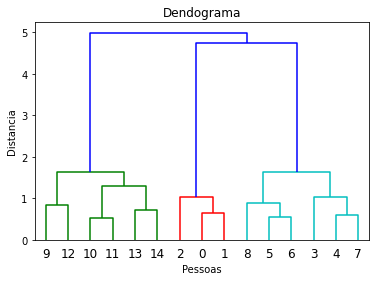

In [12]:
dendograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendograma')
plt.xlabel('Pessoas')
plt.ylabel('Distancia');

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')

In [18]:
hc_salario

AgglomerativeClustering(n_clusters=3)

In [19]:
rotulos = hc_salario.fit_predict(base_salario)

In [20]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [23]:
grafico2 = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color=rotulos)
grafico2.show()

agora vamos analisar o cartao de credito

In [24]:
base_cartao = pd.read_csv('/content/credit_card_clients.csv', header=1)

In [25]:
base_cartao

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [26]:
base_cartao['Bill_Total'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']

In [28]:
base_cartao  # # AGORA TEMOS O TOTAL, GRACAS AO AGRUPAMENTO

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Bill_Total
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,725349
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,21182
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,70496
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,266611


In [29]:
x_cartao = base_cartao.iloc[:, [1, 25]].values
x_cartao  #limite e  #divida dos clientes em matriz

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [30]:
scaler_cartao = StandardScaler()
x_cartao = scaler_cartao.fit_transform(x_cartao)

In [31]:
x_cartao  # algoritimo nao ve nenhum dado com mais importancia agora

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

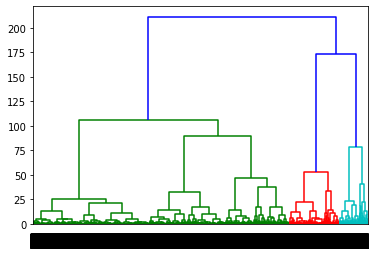

In [33]:
dendograma2 = dendrogram(linkage(x_cartao, method='ward'))

In [36]:
hc_cartao = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
rotulos_ = hc_cartao.fit_predict(x_cartao) #treinamento

In [37]:
rotulos_

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
graphs = px.scatter(x = x_cartao[:,0], y = x_cartao[:,1], color=rotulos_)
graphs.show()

Resultado proximo ao algoritimo KMeans